
PCSE 503

Eric Miers

November 14, 2020


# Assignment 3

Due Date:  11:59pm on Friday, November 13th (for now)

There are some subtle issues to worry about in each of these questions, and thus I
will be discussing each problem in class on Monday, November 9th.

## Question 1 - Fourier Analysis

Consider the following triangular pulse signal:

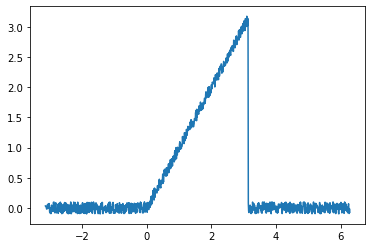

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

N_samples = 1000
t_low = -np.pi
t_high = 2.0*np.pi

t = np.linspace(t_low,t_high,N_samples)
y = np.zeros(N_samples)

for i in range(N_samples):
    if t[i] < 0.0:
        y[i] = 0.0 + 0.1*random.uniform(-1,1)
    if t[i] >= 0.0 and t[i] < np.pi:
        y[i] = t[i] + 0.1*random.uniform(-1,1)
    if t[i] >= np.pi:
        y[i] = 0.0 + 0.1*random.uniform(-1,1)
    
plt.plot(t,y)

(a) Using the jupyter notebooks called graph_fourier_basic.ipynb and graph_fourier_guitar.ipynb to help you, calcuate the Fourier transform of this signal.

You should create plots of both the real and imaginary Fourier components as a function
of frequency, a plot of the Fourier power spectrum as a function of frequency, and also
a plot of the time spectrum using the Fourier components as compared to the original time spectrum.

(b) Discuss the resulting Fourier spectrum. Which Fourier components do you expect to be small (or zero), based on the theory?  What is the Nyquist frequency, and how many terms in the Fourier series is necessary to give a good approximation to the original signal?

Nyquist frequency =  53.05164769729845
Max terms =  666


(-1.5, 1.5)

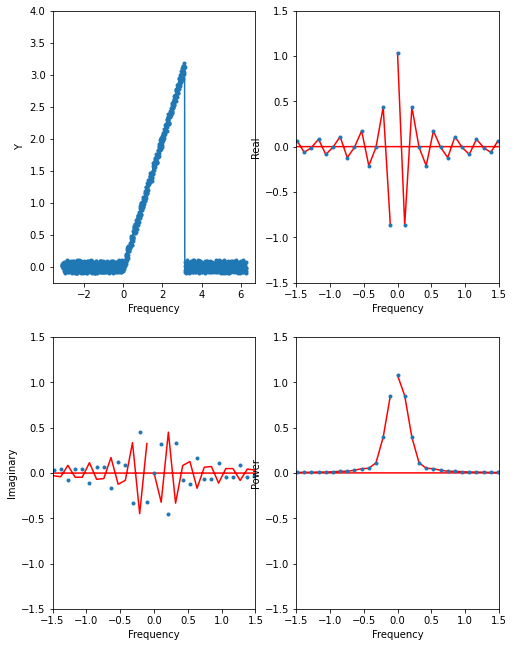

In [25]:
# PART A - Calculate the Fourier Transform of the signal

import numpy as np
from scipy.fftpack import fft

N_fft = len(y)
yfft = fft(y)
dt = (abs(t_low) + abs(t_high)) / N_fft

f_sampling = 1.0/dt
f_nyquist = f_sampling/2.0

print ('Nyquist frequency = ',f_nyquist)

nterms = int(2.0*t_high*f_nyquist)

print ('Max terms = ',nterms)

f = np.fft.fftfreq(N_fft, dt)

yfftReal = 2.0/N_fft*yfft.real
yfftImag = 2.0/N_fft*yfft.imag
powerfft = 4.0/N_fft**2*abs(yfft)**2

fig2, axs2 = plt.subplots(nrows=2, ncols=2, figsize=(8,11))

axs2[0,0].plot(t,y,'.-')
axs2[0,0].set_ylabel('Y')
axs2[0,0].set_xlabel('Frequency')
axs2[0,0].set_ylim(-0.25,4)

axs2[0,1].plot(f,yfftReal[0:N_fft],'r-')
axs2[0,1].plot(f,yfftReal,'.')
axs2[0,1].set_ylabel('Real')
axs2[0,1].set_xlabel('Frequency')
axs2[0,1].set_ylim(-1.5,1.5)
axs2[0,1].set_xlim(-1.5,1.5)

axs2[1,0].plot(f,-yfftImag[0:N_fft],'r-')
axs2[1,0].plot(f,yfftImag,'.')
axs2[1,0].set_ylabel('Imaginary')
axs2[1,0].set_xlabel('Frequency')
axs2[1,0].set_ylim(-1.5,1.5)
axs2[1,0].set_xlim(-1.5,1.5)

axs2[1,1].plot(f,powerfft[0:N_fft],'r-')
axs2[1,1].plot(f,powerfft,'.')
axs2[1,1].set_ylabel('Power')
axs2[1,1].set_xlabel('Frequency')
axs2[1,1].set_ylim(-1.5,1.5)
axs2[1,1].set_xlim(-1.5,1.5)

Nyquist frequency =  53.05164769729845
Max terms =  666
Data: n = 1.0000, a_n = -0.3168, bn = 0.5000
Data: n = 2.0000, a_n = -0.0013, bn = -0.2499
Data: n = 3.0000, a_n = -0.0318, bn = 0.1643
Data: n = 4.0000, a_n = -0.0013, bn = -0.1271
Data: n = 5.0000, a_n = -0.0111, bn = 0.0992
Data: n = 6.0000, a_n = -0.0016, bn = -0.0846
Data: n = 7.0000, a_n = -0.0062, bn = 0.0719
Data: n = 8.0000, a_n = -0.0041, bn = -0.0626
Data: n = 9.0000, a_n = -0.0005, bn = 0.0552
Data: n = 10.0000, a_n = -0.0045, bn = -0.0490


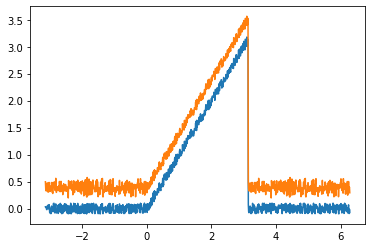

In [27]:
# plot of the time spectrum using the Fourier components as compared to the original time spectrum.
# Used code from "FourierApproximation.ipynb" -  Dr. Edward Brash

import numpy as np
from scipy.fftpack import fft

npts = len(y)
dt = (abs(t_low) + abs(t_high)) / npts

f_sampling = 1.0/dt
f_nyquist = f_sampling/2.0

print ('Nyquist frequency = ',f_nyquist)

nterms = int(2.0*t_high*f_nyquist)

print ('Max terms = ',nterms)

x2 = np.linspace(t_low,t_high,npts)
fx_fourier = np.zeros(len(x2))
fx_fourier_theory = np.zeros(len(x2))

n = []
an = []
bn = []
ant = []
bnt = []

for i in range(nterms+1):
    n.append(i/(2*np.pi))
    

    # Method 2:  Numerical integration to calculate
    # the coefficients
    
    a0sum = 0.0
    ansum = 0.0
    bnsum = 0.0
    P = t_high
    for k in range(len(x2)):
        a0sum = a0sum + 1/P*y[k]*dt
        ansum = ansum + 1/P*y[k]*np.cos(i*x2[k])*dt
        bnsum = bnsum + 1/P*y[k]*np.sin(i*x2[k])*dt
        
    if (i==0):
        an.append(a0sum)
        bn.append(0)
    else:
        an.append(ansum)
        bn.append(bnsum)   
        
    for j in range(len(x2)):
        if i==0:
            fx_fourier[j] = fx_fourier[j]+an[0]/2.0
        else:
            if (j==0 and i<=10): 
                print ("Data: n = %0.4f, a_n = %0.4f, bn = %0.4f" % (i,an[i],bn[i]))
            fx_fourier[j] = fx_fourier[j]+an[i]*np.cos(i*x2[j])+bn[i]*np.sin(i*x2[j])
        
plt.plot(t,y)
plt.plot(x2,fx_fourier)

Based on the theory, the coeffieicents of the Fourier series are computed as the area under the curve over a specific region with sine and cosine components. If one period of this signal ranges from -pi to +2pi, I would expect an, a0, bn to be really small (or zero) from -pi < t < 0, and +pi < t < +2pi. This is because the amplitude of the signal is ~0 across these regions.  The Nyquist frequency is the highest frequency that can be sampled with a sampling rate of fs without being subject to aliasing. The Nyquist frequency should be half of the sampling rate. The number of samples/terms should be at least 2x the highest frequncy of the signal (Nyquist Theorem).

## Question 2 - Frogs and Lily Pads

Modify the Jupyter Notebook called frogger.ipynb to include the possibility that the frog can jump in either direction (not just forward). Use the following algorithm:

From wherever the frog is currently sitting (i.e. anywhere from the starting position to the last lily pad), it can jump to any other available position, including back to the starting position, or to the other side of the stream.  The frog should continue jumping until that moment when it gets to the other side of the stream.  The probability should be uniform/equal for jumping to any available position.

The goal here is to calculate the average number of jumps, as function of the number of lily pads.

Does the final result surprise you?  

As a final check that your simulation is reasonable, plot the DISTRIBUTION of the number of jumps taken for N$_{lily~pads}$ = 30.

Expectation value for n = 1 is 1.000000
Expectation value for n = 2 is 1.500900
Expectation value for n = 3 is 1.836400
Expectation value for n = 4 is 2.077400
Expectation value for n = 5 is 2.286100
Expectation value for n = 6 is 2.457800
Expectation value for n = 7 is 2.580900
Expectation value for n = 8 is 2.719300
Expectation value for n = 9 is 2.827100
Expectation value for n = 10 is 2.937900
Expectation value for n = 11 is 3.026300
Expectation value for n = 12 is 3.112800
Expectation value for n = 13 is 3.172100
Expectation value for n = 14 is 3.246400
Expectation value for n = 15 is 3.298400
Expectation value for n = 16 is 3.391100
Expectation value for n = 17 is 3.469200
Expectation value for n = 18 is 3.512800
Expectation value for n = 19 is 3.529600
Expectation value for n = 20 is 3.583100
Expectation value for n = 21 is 3.642400
Expectation value for n = 22 is 3.695700
Expectation value for n = 23 is 3.720600
Expectation value for n = 24 is 3.770700
Expectation value for n =

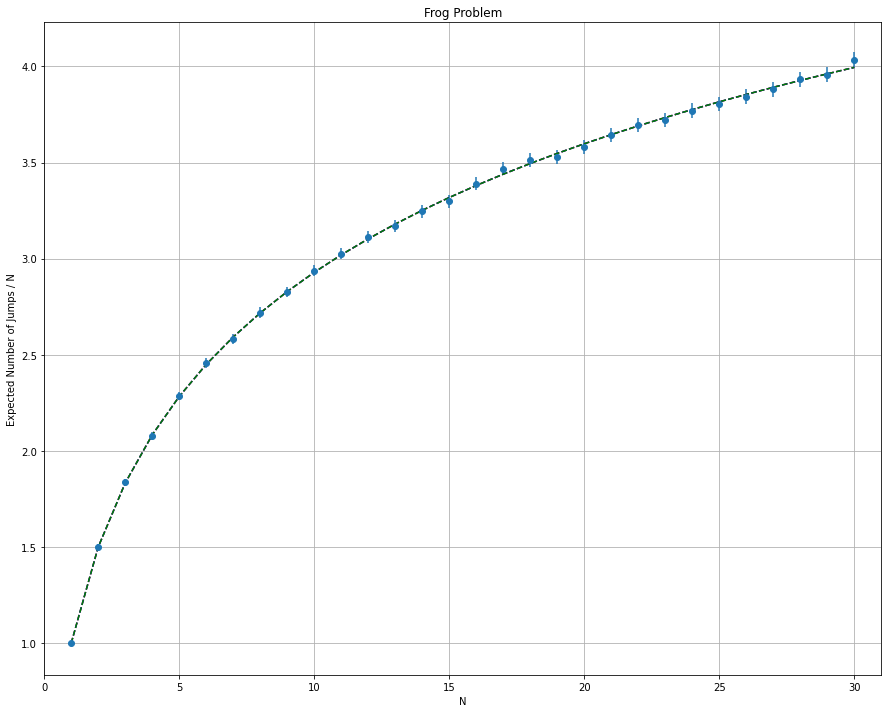

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

# def fitfunction(x,*paramlist):
#     return paramlist[0]+paramlist[1]*x+paramlist[2]*x*x+paramlist[3]*x*x*x

def simulationNoBackTracking():
  n = 30
  random.seed(1)

  start = 0
  jumpsum = 0
  total_jumps = 0
  n_trys = 10000

  x = []
  y = []
  eval = []
  evalr = []
  evalr2 = []
  evalr3 = []
  sigma = []

  for npad in range(1,n+1): 

      if (npad == 1):
          eval.append(1)
          evalr.append(1)
      else:
          sum1 = 0.0
          for i in range(1,npad):
              #print(i,npad,eval[npad-i-1])
              sum1 = sum1 + 1.0/npad*(1.0+eval[npad-i-1])

          sum1 = sum1 + 1.0/npad
          eval.append(sum1)
          #evalr.append(eval[npad-1]/npad)
          evalr.append(eval[npad-1])
      #print("Theory: ",npad,eval[npad-1])
      
      sum1 = 0.0
      for i in range(1,npad+1):
          sum1 = sum1 + 1.0/i
      evalr2.append(sum1)
      
      x.append(npad)
      
      sum2 = 1.0/stats.hmean(x)*npad
      evalr3.append(sum2)
      
      #print (npad,sum2)
      
      end = npad

      for j in range(n_trys):
          while start < npad:
              jump = int(random.uniform(1,(end-start+1)))
              #jump = int(random.uniform(1,(end)))
              #print ("Jump = ",jump)
              start = start + jump
              #print ("Now at ",start)
              jumpsum = jumpsum + 1
          start = 0
          #print ("j = %d, Total_jumps = %d" % (j,jumpsum))
          total_jumps = total_jumps + jumpsum
          jumpsum = 0
      
      #print (npad,total_jumps,n_trys)

      expectation_value = total_jumps/n_trys*1.0
      y.append(expectation_value)
      sigma.append(expectation_value*1/np.sqrt(n_trys))
      total_jumps = 0
      
      print ("Expectation value for n = %d is %f" % (npad,expectation_value))

  fig = plt.figure(figsize=(15,12))
  ax1 = fig.add_subplot(111)

  ax1.set_title("Frog Problem")
  ax1.set_xlabel('N')
  ax1.set_ylabel('Expected Number of Jumps / N')
  ax1.set_xlim(0,n+1)
  #ax1.set_yscale("log")
  #ax1.set_xscale("log")
  ax1.grid(True)

  ax1.errorbar(x,y,yerr=sigma,fmt='o')
  ax1.plot(x,evalr,'r--')
  ax1.plot(x,evalr2,'b--')
  ax1.plot(x,evalr3,'g--')



def simulationBackTracking():
  n = 30
  random.seed(1)

  start = 0
  jumpsum = 0
  total_jumps = 0
  n_trys = 10000

  x = []
  y = []
  eval = []
  evalr = []
  evalr2 = []
  evalr3 = []
  sigma = []

  for npad in range(1,n+1): 

      if (npad == 1):
          eval.append(1)
          evalr.append(1)
      else:
          sum1 = 0.0
          for i in range(1,npad):
              #print(i,npad,eval[npad-i-1])
              sum1 = sum1 + 1.0/npad*(1.0+eval[npad-i-1])

          sum1 = sum1 + 1.0/npad
          eval.append(sum1)
          #evalr.append(eval[npad-1]/npad)
          evalr.append(eval[npad-1])
      #print("Theory: ",npad,eval[npad-1])
      
      sum1 = 0.0
      for i in range(1,npad+1):
          sum1 = sum1 + 1.0/i
      evalr2.append(sum1)
      
      x.append(npad)
      
      sum2 = 1.0/stats.hmean(x)*npad
      evalr3.append(sum2)
      
      #print (npad,sum2)
      
      end = npad
      
      jumpsTakenPerTry = []
      for j in range(n_trys):
          while start < npad:
            
            jump = start
            while jump == start:
              jump = int(random.uniform(0, end+1))

            #print ("Jump = ",jump)
            #start = start + jump
            start = jump
            #print ("Now at ",start)
            jumpsum = jumpsum + 1

          start = 0
          #print ("j = %d, Total_jumps = %d" % (j,jumpsum))
          total_jumps = total_jumps + jumpsum
          jumpsTakenPerTry.append(jumpsum)
          jumpsum = 0
      
      #print (npad,total_jumps,n_trys)

      expectation_value = total_jumps/n_trys*1.0
      y.append(expectation_value)
      sigma.append(expectation_value*1/np.sqrt(n_trys))
      total_jumps = 0
      
      print ("Expectation value for n = %d is %f" % (npad,expectation_value))

  fig = plt.figure(figsize=(15,12))
  ax1 = fig.add_subplot(111)

  ax1.set_title("Frog Problem")
  ax1.set_xlabel('N')
  ax1.set_ylabel('Expected Number of Jumps / N')
  ax1.set_xlim(0,n+1)
  #ax1.set_yscale("log")
  #ax1.set_xscale("log")
  ax1.grid(True)

  ax1.errorbar(x,y,yerr=sigma,fmt='o')
  # ax1.plot(x,evalr,'r--')
  # ax1.plot(x,evalr2,'b--')
  #ax1.plot(x,evalr3,'g--')

  return jumpsTakenPerTry

# Original Simulation - No Backtracking Allowed
simulationNoBackTracking()

Expectation value for n = 1 is 1.000000
Expectation value for n = 2 is 1.987800
Expectation value for n = 3 is 2.985400
Expectation value for n = 4 is 3.975200
Expectation value for n = 5 is 4.990500
Expectation value for n = 6 is 6.077200
Expectation value for n = 7 is 6.951300
Expectation value for n = 8 is 7.996200
Expectation value for n = 9 is 8.988500
Expectation value for n = 10 is 9.901500
Expectation value for n = 11 is 10.987500
Expectation value for n = 12 is 11.983700
Expectation value for n = 13 is 12.992300
Expectation value for n = 14 is 13.906200
Expectation value for n = 15 is 15.086000
Expectation value for n = 16 is 16.042700
Expectation value for n = 17 is 17.102200
Expectation value for n = 18 is 17.918500
Expectation value for n = 19 is 19.112500
Expectation value for n = 20 is 19.877300
Expectation value for n = 21 is 21.291500
Expectation value for n = 22 is 22.424200
Expectation value for n = 23 is 22.873300
Expectation value for n = 24 is 23.849400
Expectation

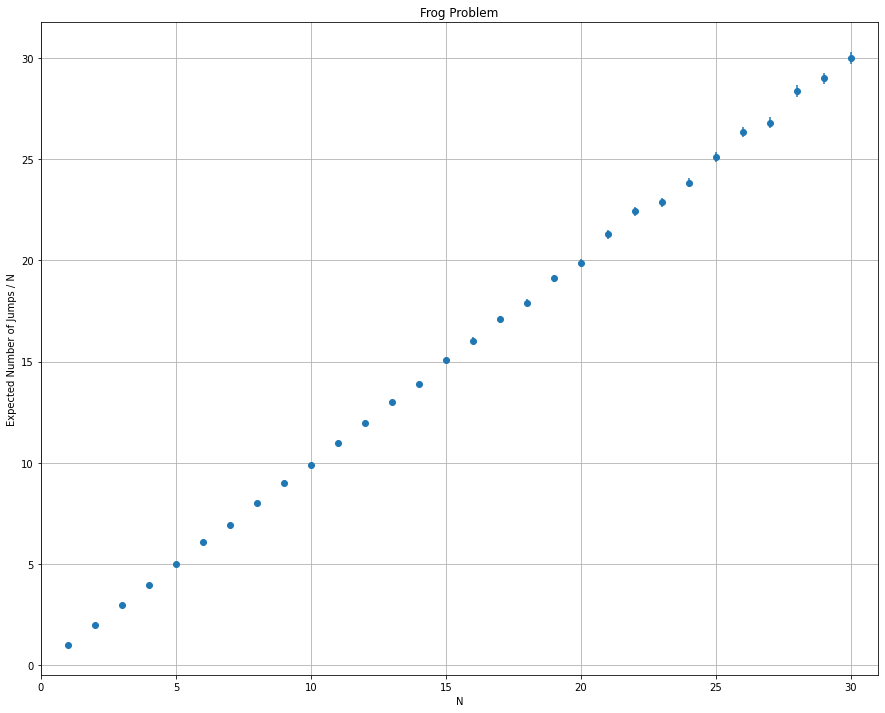

In [29]:
# New Simulation - Backtracking Allowed (equal probability for all other lillypads)
jumpsDist = simulationBackTracking()

Average: 29.9957


(array([1.009e+03, 9.110e+02, 8.450e+02, 4.830e+02, 6.670e+02, 5.540e+02,
        5.540e+02, 3.160e+02, 4.170e+02, 3.870e+02, 3.560e+02, 2.220e+02,
        3.360e+02, 2.900e+02, 2.570e+02, 1.530e+02, 2.030e+02, 2.080e+02,
        1.830e+02, 1.140e+02, 1.330e+02, 1.270e+02, 1.400e+02, 6.300e+01,
        9.400e+01, 9.100e+01, 4.800e+01, 7.400e+01, 7.100e+01, 6.600e+01,
        2.300e+01, 4.600e+01, 5.300e+01, 4.900e+01, 2.800e+01, 4.600e+01,
        3.300e+01, 2.600e+01, 2.100e+01, 2.400e+01, 2.300e+01, 2.900e+01,
        1.700e+01, 1.800e+01, 2.200e+01, 1.800e+01, 1.500e+01, 1.700e+01,
        1.300e+01, 4.000e+00, 9.000e+00, 1.200e+01, 7.000e+00, 6.000e+00,
        4.000e+00, 4.000e+00, 2.000e+00, 2.000e+00, 8.000e+00, 5.000e+00,
        1.000e+00, 3.000e+00, 7.000e+00, 5.000e+00, 5.000e+00, 1.000e+00,
        5.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        3.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 4.000e+00, 0.000e+0

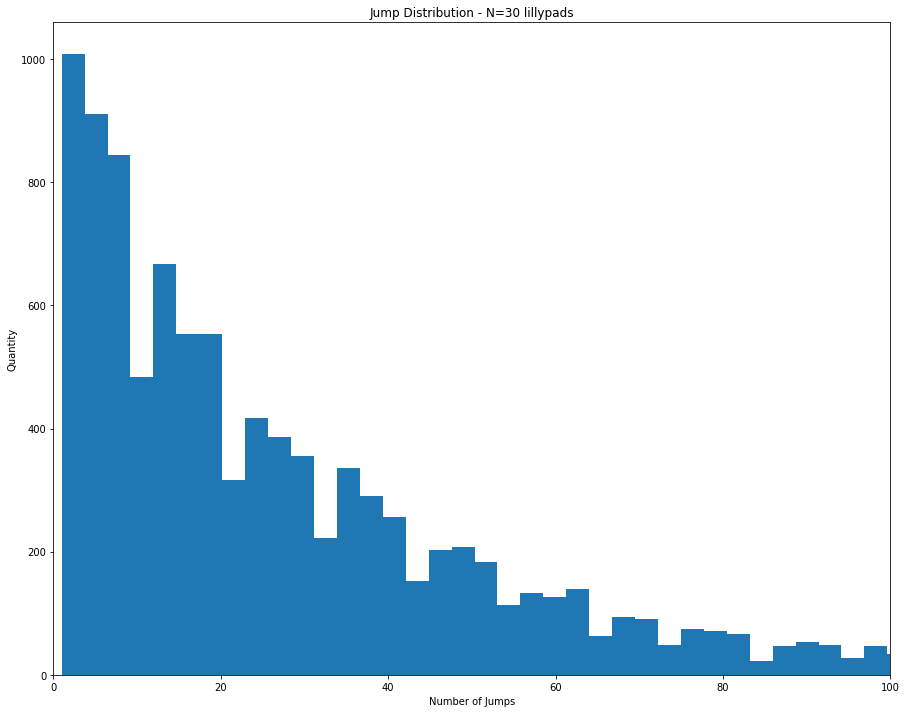

In [82]:
# plot the DISTRIBUTION of the number of jumps taken for N_lily pads = 30

from statistics import mean 
print("Average: {}".format(mean(jumpsDist)))

fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

ax1.set_title("Jump Distribution - N=30 lillypads")
ax1.set_xlabel('Number of Jumps')
ax1.set_ylabel('Quantity')
ax1.set_xlim(0,100)

ax1.hist(jumpsDist, bins=100)

There appears to be a linear relationship between the number of lilly pads and number of jumps required. This is surprising to me because I figured that as the number of lillypads increased, the number of jumps would increase at a greater rate given that there is an equal probability to hop to all of the lillypads. I was expecting more of an exponential increase in the number of jumps.

## Question 3 - Random Walk

Begin with the example Jupyter Notebook called drunken_sailor.ipynb  

In the first example, we considered random walk in one dimension.  For each step that a sailor took, we sampled from a random Gaussian distribution with a mean value of 0 and a standard deviation of 1.  

In this question, we would like to consider a different underlying distribution for the step size.  Instead of using a Gaussian, choose the step size from a Poisson distribution with an average value of 1.  Remember that the Poisson distribution is defined for positive values of $x$ only, and so you will also have to randomly choose the direction of the step.

How do the results compare to choosing a Gaussian distribution of step size?  Do your results agree with the predictions of the central limit theorem?

In [33]:
# example making a random walk and showing that the distribution after a number of
# steps is a gaussian 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats # has lots of distribution functions in it

from math import erfc   # complimentary error function 


# Used to choose the direction of the step for the Poisson Distribution
def positiveSign():
  x = int(random.uniform(0,2))
  if x == 1:
    return True
  
  return False


# randomly walk nsteps and return the x value
# starting at x=0
#
# each step has zero mean and a variance of 1
#
# so, sometimes the steps are forward, and sometimes the steps are backwards, and
# the LENGTH of each step is variable, according to a Gaussian with a sigma of 1.
def walknGaussian(nsteps):  # random walk using a normal distribution for step sizes
    r = stats.norm.rvs(size=nsteps) # normal distribution mean=0 variance=1
    # r is a vector values randomly generated with a normal distribution
    return np.sum(r)  # the sum of the entire vector!  If we just add up all the steps
                   # we will get the final position!!!

def walknPoisson(nsteps):  # random walk using a Poisson distribution for step sizes
    r = stats.poisson.rvs(1, size=nsteps)

    # Randomly choose a direction for each step
    for i in range(0, len(r)):
      if not positiveSign():
        r[i] *= -1
    
    return np.sum(r)  # the sum of the entire vector!  If we just add up all the steps
                   # we will get the final position!!!

# walk npart numbers of particles (or sailors) nsteps and return a vector of x positions
# the function that gives us a randomly generated position is walkn
def npart_walkn(npart,nsteps,dist):
    xvec = np.zeros(0)
    for i in range(npart):
        if dist == "Poisson":
          x = walknPoisson(nsteps)  # a single random walk value
        else:
          x = walknGaussian(nsteps)
        xvec = np.append(xvec,x)  # append each random walk to the vector
    return xvec  # we return a vector - each element is the final position of a sailors.

nsteps = 100 # number of steps
npart = 1000 # number of particles (sailors) to let walk around

# fill a vector with npart walkers each walking nsteps
xvecGaussian = npart_walkn(npart,nsteps,"Gaussian")
xvecPoisson = npart_walkn(npart,nsteps,"Poisson")



Text(0, 0.5, 'p(x)')

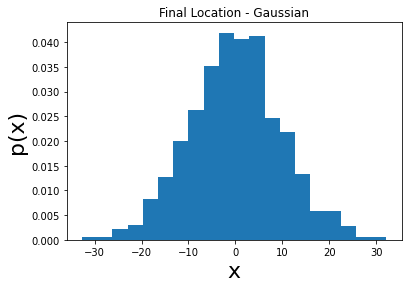

In [34]:
# GAUSSIAN STEP DISTRIBUTION

# plot the histogram, i.e., measured distribution of final positions 
#   after n steps of random walking 
n, bins, patches = plt.hist(xvecGaussian,bins=20,density=True)
#
# density = True will make it a normalized probability histogram
#
# this retuns as n the number of values counted, bins is the x values of the bins, 
# patches is for plotting the histogram
#
# bins will be the most important thing here - we will use that below
#
plt.title("Final Location - Gaussian")
plt.xlabel("x",fontsize=22)
plt.ylabel("p(x)",fontsize=22)  # probability!

# # a gaussian probability density distribution, this is a function!
# mygaus = stats.norm(0.0, np.sqrt(nsteps))  # should scale with sqrt(nsteps)
# y = mygaus.pdf(bins)  # evaluate the function at the bin locations
# plt.plot(bins,y,"k", lw=3 )  #plot the expected density distribution as a black line

Text(0, 0.5, 'p(x)')

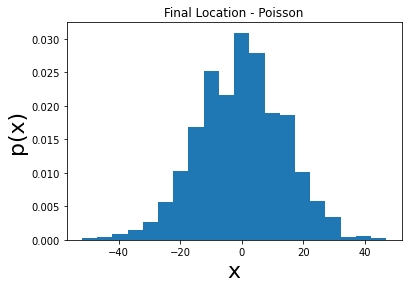

In [35]:
# POISSON STEP DISTRIBUTION

# plot the histogram, i.e., measured distribution of final positions 
#   after n steps of random walking 
n, bins, patches = plt.hist(xvecPoisson,bins=20,density=True)
#
# density = True will make it a normalized probability histogram
#
# this retuns as n the number of values counted, bins is the x values of the bins, 
# patches is for plotting the histogram
#
# bins will be the most important thing here - we will use that below
#
plt.title("Final Location - Poisson")
plt.xlabel("x",fontsize=22)
plt.ylabel("p(x)",fontsize=22)  # probability!

# # a gaussian probability density distribution, this is a function!
# mygaus = stats.norm(0.0, np.sqrt(nsteps))  # should scale with sqrt(nsteps)
# y = mygaus.pdf(bins)  # evaluate the function at the bin locations
# plt.plot(bins,y,"k", lw=3 )  #plot the expected density distribution as a black line

Comparing the results of Gaussian and Poisson-based walks, both seem to yield a normal distribution when looking at the final locations of the sailors (the sum of the steps). This agrees with the Central Limit Theorem that states the normalized sum of independent random variables tends towards a normal distribution, even if the variables themselves do not follow a normal distribution. In this case, the steps would be our random independent variable generated from a non-normal distribution function (i.e. Poisson), however the sums of the steps (final locations) reflect a normal bell curve. 